Ido Hadanny 034537969

Bar Dagan 303026454         

In [327]:
import numpy as np
import matplotlib.pyplot as plt

In [328]:
def cauchy_pdf(x, a, b):
    return 1/(np.pi*b)*1/(1+((x-a)/b)**2)

In [329]:
def cauchy_cdf(x, a, b):
    return np.arctan((x-a)/b)/np.pi + 1/2

In [330]:
a, b = 3, 10

In [331]:
x = np.arange(-20, 20, 0.01)

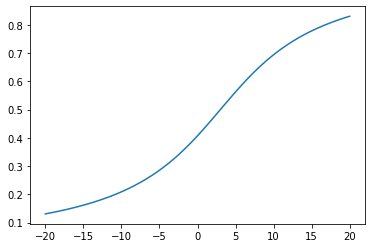

In [332]:
plt.plot(x, cauchy_cdf(x, a, b))
plt.show()

In [333]:
def inv_cauchy_cdf(y, a, b):
    return b*np.tan(np.pi*(y-0.5))+a


In [334]:
for x_i in x:
    assert np.isclose(x_i, inv_cauchy_cdf(cauchy_cdf(x_i, a, b), a, b))

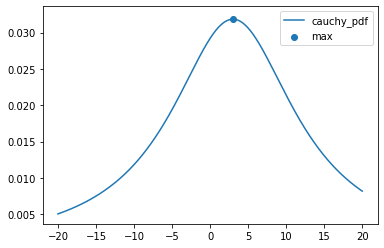

In [335]:
plt.plot(x, cauchy_pdf(x, a, b), label='cauchy_pdf')
plt.scatter([a], [1/(np.pi*b)], label='max')
plt.legend()
plt.show()


In [336]:
def sample_cauchy(a, b, N):
    y = np.random.uniform(size=N)
    return inv_cauchy_cdf(y, a, b)

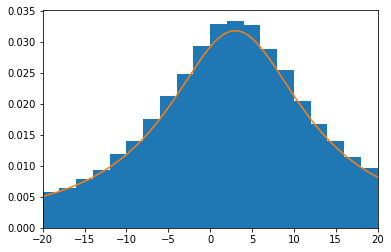

In [337]:
ys = sample_cauchy(a, b, 100000)
plt.hist(ys, range=(-100, 100), bins=100, density=True)
plt.plot(x, g(x, a, b), label='g')
plt.xlim(-20, 20)
plt.show()

In [338]:
def gamma_pdf(x, alpha, beta):
    return x**(alpha-1)*np.exp(-x*beta)

In [339]:
def ab(alpha, beta):
    a=(alpha-1)/beta
    b=np.sqrt(2*alpha)/beta
    k=np.pi*b*((alpha-1)/(beta*np.e))**(alpha-1)
    return a, b, k   

In [340]:
alpha, beta = 5, 2
a, b, k = ab(alpha, beta)
print(a, b, k)

2.0 1.5811388300841898 1.4556666494766188


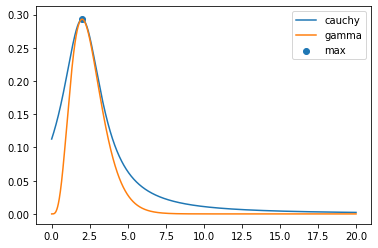

In [341]:
x=np.arange(0, 20, 0.01)
plt.plot(x, k*cauchy_pdf(x, a, b), label='cauchy')
plt.scatter([a], [k/(np.pi*b)], label='max')
plt.plot(x, gamma_pdf(x, alpha, beta), label='gamma')
plt.legend()
plt.show()


In [342]:
def sample_gamma(alpha, beta, N):
    a, b, k = ab(alpha, beta)
    x = sample_cauchy(a, b, N)
    x = x[x>=0]
    ratio = gamma_pdf(x, alpha, beta)/(k*cauchy_pdf(x, a, b))
    return x[np.random.uniform(size=len(x)) < ratio]

acceptance ratio: 0.5158


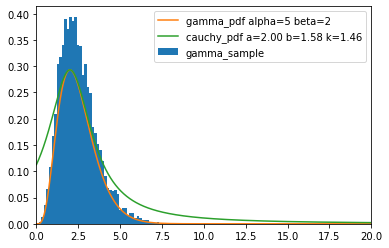

In [346]:
N=10000
ys2 = sample_gamma(alpha, beta, N)
print(f"acceptance ratio: {len(ys2)/N}")
plt.hist(ys2, range=(0, 30), bins=200, 
         density=True, label='gamma_sample')
plt.xlim(0, 20)
plt.plot(x, gamma_pdf(x, alpha, beta), 
         label=f'gamma_pdf alpha={alpha} beta={beta}')
plt.plot(x, k*cauchy_pdf(x, a, b), 
         label=f'cauchy_pdf a={a:.2f} b={b:.2f} k={k:.2f}')
plt.legend()
plt.show()